In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

fecha = '05-07'
ds = '../../data/' + fecha + '-dataset.csv'
numerical_ds = '../../data/' + fecha + '-dataset-numerical.csv'

df = pd.read_csv(ds)
df = df.drop(columns=['user','replay','group'])
df_numerical = pd.read_csv(numerical_ds)

In [2]:
X = df_numerical.drop(columns=['spatial_reasoning','cube','sphere','ramp','cylinder','cone','pyramid'])
y = df['spatial_reasoning']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

train_pred = rf_regressor.predict(X_train)
r2_score_train = r2_score(y_train, train_pred)
print(r2_score_train)

0.9700402369936797


In [4]:
test_pred = rf_regressor.predict(X_test)
r2_score_test = r2_score(y_test, test_pred)
print(r2_score_test)

0.7028374996322121


In [5]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, None],
    'max_features': ["sqrt", "log2", None],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [10]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4], 'n_estimators': [10]},
             verbose=2)

In [6]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [7]:
train_pred = grid_search.predict(X_train)
r2_score(y_train, train_pred)

0.9523084926298289

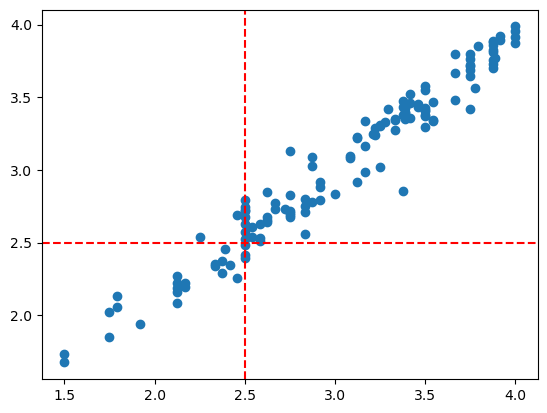

In [8]:
plt.scatter(y_train, train_pred)

plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='r', linestyle='--', label='y=2.5')

In [9]:
predictions = grid_search.predict(X_test)
r2_score(y_test,predictions)

0.7578959602200843

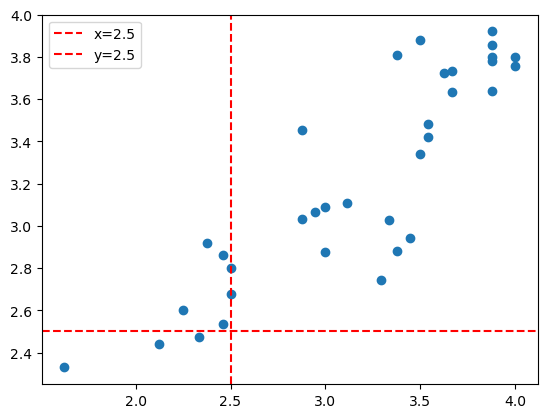

In [10]:
plt.scatter(y_test, predictions)
# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='r', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()